In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(x_train_full,y_train_full),(x_test,y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
#train test split data
x_valid,x_train = x_train_full[:5000]/255.0 ,x_train_full[5000:]/255.0
y_valid,y_train = y_train_full[:5000],y_train_full[5000:]

In [6]:
class_names = ['T-shirt/top','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot']

In [9]:
x_train.shape

(55000, 28, 28)

In [8]:
##Creating the model
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28])) #for simple preprocessing to convert each input image into a 1D array #and we will add the shape of the instances
model.add(keras.layers.Dense(300,activation='relu'))#Dense hidden layer with 300 Neurons
model.add(keras.layers.Dense(100,activation='relu'))#Second dense layer with 100 Neuron
model.add(keras.layers.Dense(10,activation='softmax'))# final output layer with 10 Neurons(one per class)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [11]:
#compiling the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])


In [12]:
##Training and evaluating the model
history = model.fit(x_train,y_train,epochs=30,validation_data=(x_valid,y_valid))
#larger weight to underpresented class and lower weigth to overpresented class

Epoch 1/30
1719/1719 [==============================] - 7s 3ms/step - loss: 0.7173 - accuracy: 0.7645 - val_loss: 0.5162 - val_accuracy: 0.8244
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4920 - accuracy: 0.8283 - val_loss: 0.4523 - val_accuracy: 0.8436
Epoch 3/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4473 - accuracy: 0.8422 - val_loss: 0.4235 - val_accuracy: 0.8598
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4189 - accuracy: 0.8536 - val_loss: 0.4078 - val_accuracy: 0.8576
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3987 - accuracy: 0.8598 - val_loss: 0.4116 - val_accuracy: 0.8592
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3813 - accuracy: 0.8665 - val_loss: 0.3820 - val_accuracy: 0.8662
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3672 - accuracy: 0.8706 - val_loss: 0.3724 - val_accuracy:

In [13]:
#Lets do some visulaization
import pandas as pd
import matplotlib.pyplot as plt


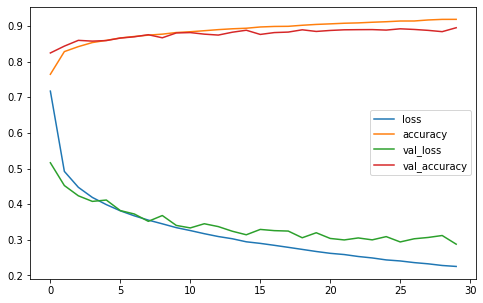

In [14]:
pd.DataFrame(history.history).plot(figsize=(8,5))
